# Text Analysis (Apple tweets)

This notebook explores a dataset of tweets that included `@apple`.

### Imports

In [1]:
import pandas as pd # For dataframe manipulation

import nltk  # machine learning with text

from nltk.corpus import stopwords, wordnet  # List of common words

from nltk.tokenize import word_tokenize  # Split text into significant forms

from nltk.stem import WordNetLemmatizer  # Reduce words to their root form ("lemma")

from nltk import pos_tag  # Tag words with parts of speech

from collections import defaultdict  # Dictionaries that have a backup value

from sklearn.feature_extraction.text import CountVectorizer  # Convert text to sparse matrices

import matplotlib.pyplot as plt  # Complex visualisation configuration

import seaborn as sns  # Visualisation

from wordcloud import WordCloud  # Create wordclouds

from textblob import TextBlob  # Sentiment analysis

from gensim.models.ldamodel import LdaModel  # Topic extraction

from gensim.models.phrases import Phrases  # ngrams

from gensim import corpora  # Vectorization

import pyLDAvis.gensim  # Visualise topics

In [2]:
# Install necessary dependencies from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/danielkeefe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielkeefe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/danielkeefe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Data sourcing

In [3]:
# Load the data from a .csv

tweets = pd.read_csv("apple_tweets.csv")

### Data exploration

In [4]:
# Inspect the data

tweets.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,5746452.0,1.090372e+18,1548799817,waltmossberg,It’s true that @Apple likely overpriced the la...,Twitter for iPad,279,NaN,NaN,NaN,...,21783,31007,1178213411,True,https://t.co/AH9VhHsJmY,http://www.theverge.com/label/walt-mossberg-verge,en,https://pbs.twimg.com/profile_banners/5746452/...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/4637351296...
1,5746452.0,1.090374e+18,1548800328,waltmossberg,@AaronSuplizio @Apple Yes it is.,Twitter for iPad,10,1.090373e+18,2.365419e+07,AaronSuplizio,...,21783,31007,1178213411,True,https://t.co/AH9VhHsJmY,http://www.theverge.com/label/walt-mossberg-verge,en,https://pbs.twimg.com/profile_banners/5746452/...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/4637351296...
2,5746452.0,1.090382e+18,1548802301,waltmossberg,"@mvigod @Apple As I have said many times here,...",Twitter for iPad,259,1.090381e+18,2.224800e+08,mvigod,...,21783,31007,1178213411,True,https://t.co/AH9VhHsJmY,http://www.theverge.com/label/walt-mossberg-verge,en,https://pbs.twimg.com/profile_banners/5746452/...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/4637351296...
3,5746452.0,1.090373e+18,1548800242,waltmossberg,I’m not saying that @Apple doesn’t have proble...,Twitter for iPad,270,1.090372e+18,5.746452e+06,waltmossberg,...,21783,31007,1178213411,True,https://t.co/AH9VhHsJmY,http://www.theverge.com/label/walt-mossberg-verge,en,https://pbs.twimg.com/profile_banners/5746452/...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/4637351296...
4,1175221.0,1.090110e+18,1548737368,digiphile,@DaveLeeBBC @Apple @NYGovCuomo Nor I; saw it g...,Twitter for iPhone,88,1.090109e+18,1.251786e+09,DaveLeeBBC,...,165604,108196,1173899540,True,https://t.co/QWOxhaw2kk,https://digiphile.info/about/,en,https://pbs.twimg.com/profile_banners/1175221/...,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/1076306605...


In [5]:
# Get the number of rows & columns

print("Rows:", tweets.shape[0])
print("Columns:", tweets.shape[1])

Rows: 9991
Columns: 88


### Data cleaning

In [6]:
# Keep only interesting columns

tweets = tweets[["screen_name", "text",
                 "source", "favorite_count",
                 "retweet_count", "verified",
                 "followers_count"]]

In [7]:
# Check for NaN values

tweets.isna().sum()

screen_name        0
text               0
source             0
favorite_count     0
retweet_count      0
verified           0
followers_count    0
dtype: int64

In [8]:
# Display the data again

tweets.sample(5)

,screen_name,text,source,favorite_count,retweet_count,verified,followers_count
2839,_ValerianoCossu,@nicksdjohnson @Apple You can install linux Ub...,Twitter for Android,0,0,False,3
4537,FrankBastings,@khaled @TheHackersNews @iAbdulrahmn ...and wi...,Twitter for iPad,0,0,False,14
15,shahedC,Come on @Apple @AppleSupport there’s no need t...,Twitter for iPhone,0,0,False,2292
7660,iamrohit_19,"Hey, fuck you @Apple for putting up all those ...",Twitter for Android,1,0,False,20
6077,josephsreed,No idea why @apple doesn’t blanket every media...,Twitter for iPhone,0,0,False,351


### Text cleaning (punctuation)

In [9]:
# Pull a random (actually, 680 is a really good example) tweet's text, consider the problems with it

tweets["text"].iloc[680]

# There are multiple ways of doing the above, all of them annoying and fiddly.

'✨🍎@Apple : Apple was warned about the FaceTime eavesdropping bug last week https://t.co/zry3BCizbj #Tech #Apple $AAPL #Technology #TechNews https://t.co/ip8dhXg48K'

In [10]:
# Convert everything to lower case for simplicity's sake

tweets["text"] = tweets["text"].str.lower()

In [11]:
# Remove @s and hashtags

tweets["text"] = tweets["text"].replace(to_replace=r"[#@]\w+", value=" ", regex=True)

The next section cleans the text in more detail, eventually resulting in the clean dataset. If you have access to the clean data, you can skip to the "text cleaning (words)" section.

In [12]:
# Deal with quote marks being difficult

tweets["text"] = tweets["text"].replace(to_replace="(\u2019)", value="'", regex=True)

# Replace the most common contractions

tweets["text"] = tweets["text"].replace(to_replace="n't", value=" not", regex=True)

tweets["text"] = tweets["text"].replace(to_replace="it's", value="it is", regex=True)

tweets["text"] = tweets["text"].replace(to_replace="i've", value="i have", regex=True)

tweets["text"] = tweets["text"].replace(to_replace="i'm", value="i am", regex=True)

tweets["text"] = tweets["text"].replace(to_replace="'s", value="", regex=True)

In [13]:
# Remove ampersands

tweets["text"] = tweets["text"].replace(to_replace=r"&amp", value="", regex=True)

In [14]:
# Remove links

tweets["text"] = tweets["text"].replace(to_replace=r"http[s]?:\/\/[^\s]+", value="", regex=True)

In [15]:
# Remove numbers

tweets["text"] = tweets["text"].replace(to_replace=r"\d+", value="", regex=True)

In [16]:
# Remove standard punctuation and replace with spaces

tweets["text"] = tweets["text"].replace(to_replace=r"\W", value=" ", regex=True)

In [17]:
# Remove extra spaces

tweets["text"] = tweets["text"].replace(to_replace=r"\s+", value=" ", regex=True)

In [18]:
tweets["text"].head()

0    it is true that likely overpriced the latest i...
1                                           yes it is 
2     as i have said many times here with regard to...
3    i am not saying that does not have problems an...
4     nor i saw it go by and then tracked it down t...
Name: text, dtype: object

In [19]:
# Write the clean dataset to .csv

tweets.to_csv("apple_tweets_clean.csv", index=False)

### Text cleaning (words) 

In [20]:
# Tokenise the words so they can be dealt with individually

tweets["text"] = tweets["text"].apply(word_tokenize)

Lemmatization is important and useful, but takes too long to do properly in the workshop. The cell below lemmatizes the text, but is not covered in detail during the workshop.

In [21]:
# Lemmatize the words, reducing them back to their roots

# Object to lemmatize words 

lemma = WordNetLemmatizer()

# Dictionary to convert between part-of-speech tags and the ones the lemmatizer understands

tag_dict = defaultdict(lambda : wordnet.NOUN)
tag_dict['J'] = wordnet.ADJ
tag_dict['V'] = wordnet.VERB
tag_dict['R'] = wordnet.ADV

# function to lemmatize a sentence

def get_lemma(word):
    """Gets the POS tag for a word, and then returns the lemmatized form of the word"""
    tag = pos_tag([word])[0][1][0]
    tag = tag_dict[tag]
    
    return lemma.lemmatize(word, tag)

# Actually perform the lemmatization

tweets["text"] = tweets["text"].apply(lambda x: [get_lemma(word) for word in x])

In [22]:
# Remove common words

stop_words = stopwords.words("english")
stop_words.extend(["apple", "aapl"])  # Add specific words

# Filter the words, removing the ones in stop_words and those of <=2 letters
tweets["text"] = tweets["text"].apply(lambda x: [y for y in x if y not in stop_words
                                                              and len(y) > 2])

In [23]:
# Drop rows with zero words remaining

tweets = tweets[tweets["text"].str.len() > 0]

In [24]:
# Check the new shape

print("Rows:", tweets.shape[0])
print("Columns:", tweets.shape[1])

Rows: 9897
Columns: 7


In [25]:
# Join the lists of words back into strings

tweets["text"] = tweets["text"].apply(lambda x: " ".join(x))

In [26]:
# Inspect the data again

tweets["text"].head()

0    true likely overprice late iphones mature mark...
1                                                  yes
2    say many time regard multiple company market c...
3    say problem challenge say perspective order ma...
4                                  saw tracked confirm
Name: text, dtype: object

### Data exploration (text) 

In [27]:
# How many rows does the word 'bug' appear in?

search_term = input("Enter a word: ")

tweets[tweets["text"].str.contains(search_term)]["text"].count()

Enter a word: bug


487

In [28]:
# Create a document-term matrix

# Create an object that converts strings into a sparse matrix

vectorizer = CountVectorizer(max_features= 10000 , min_df=0.01, ngram_range= (1,1))

# Convert the text column to a sparse matrix

tweets_dtm = vectorizer.fit_transform(tweets["text"])

In [29]:
# View the bag-of-words model

tweets_dtm

<9897x135 sparse matrix of type '<class 'numpy.int64'>'
	with 30862 stored elements in Compressed Sparse Row format>

In [30]:
# Create a dataframe of terms and frequencies

# Get the frequency of each term

term_frequencies = tweets_dtm.sum(axis=0)

# Match frequencies to terms

frequent_terms = [(word, term_frequencies[0, id]) for word, id in vectorizer.vocabulary_.items()]

# Convert the word-frequency pairings to a dataframe

term_df = pd.DataFrame(columns=["term",
                                   "frequency"], data=frequent_terms)

# Sort the dataframe

term_df.sort_values(by="frequency", ascending=False, inplace=True)

In [31]:
# Inspect the most frequent terms

term_df.head(10)

,term,frequency
79,get,1110
15,iphone,1084
68,phone,949
104,facetime,738
20,new,700
58,like,646
64,make,640
21,fix,623
26,use,534
48,need,529


### Data visualisation

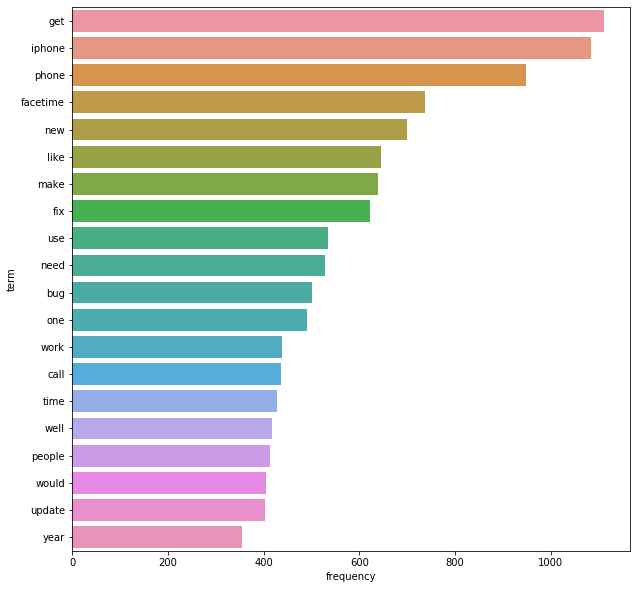

In [32]:
# Set figure size

plt.figure(figsize = (10,10))

# Plot the most frequent terms

sns.barplot(x="frequency", y="term", data=term_df.head(20))

### Word cloud

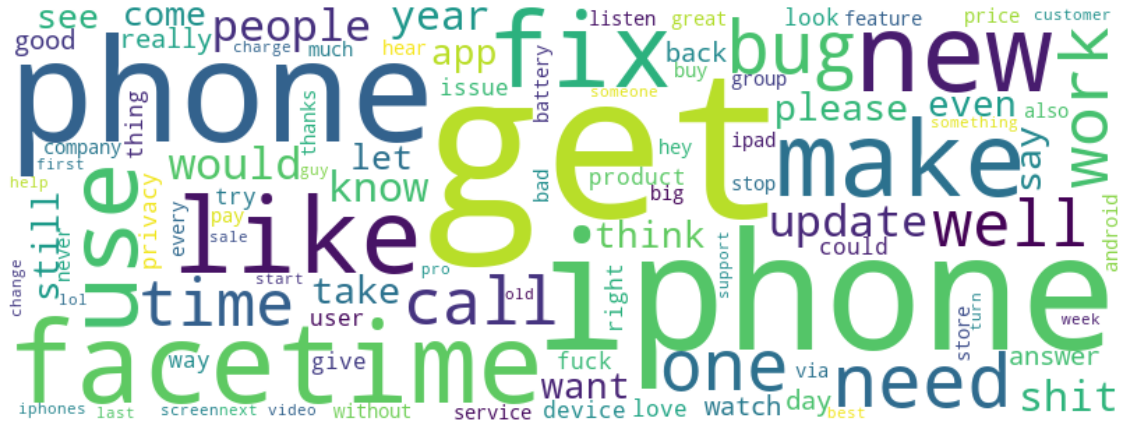

In [33]:
# Create a dictionary of most frequent terms ((required for word clouds)

term_dict = term_df.set_index('term')['frequency'].to_dict()

# Create a wordcloud of most frequent terms

wc = WordCloud(width=800, height=300, background_color="white",
               max_words=100)

wc.generate_from_frequencies(term_dict)

# Display the cloud

plt.figure(figsize=(20, 10))

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

### Sentiment analysis 

In [34]:
# Assign sentiment to each tweet

tweets["sentiment"] = tweets["text"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [35]:
# Examine the worst tweets

tweets.sort_values(by="sentiment", ascending=True)[["text", "sentiment"]].head(10)

,text,sentiment
3213,insane ever heard,-1.0
690,never expect even get pathetic service,-1.0
2759,assume qcom trading terribly,-1.0
8525,either need fix conference call iphone max hor...,-1.0
2845,everyone worried facetime glitch concerned thi...,-1.0
5201,dam facetime nasty,-1.0
9414,tech company paint company pathetic way sell t...,-1.0
9413,phone par lcd cruel joke,-1.0
4662,terrible everyone disable facetime need fix asap,-1.0
2393,sans credit still try get iron egregious bug d...,-1.0


### Topic analysis 

In [36]:
# extract just the text column as a list of lists

tweet_topics = list(tweets["text"].apply(lambda x: x.split(" ")))

# Create a gensim dictionary of terms from the text
# Map each word to an id

topic_dict = corpora.Dictionary(tweet_topics)

# Use the dictionary to generate a corpus from the texts
# Convert the keywords into dictionary references

topic_corpus = [topic_dict.doc2bow(text) for text in tweet_topics]

In [37]:
# Identify topics (5 was picked at random)

topic_model = LdaModel(topic_corpus, num_topics=5, id2word=topic_dict, passes=15)

In [38]:
# Visualise topics
# This is a slow and computationally expensive process - my machine's fan goes crazy during it. 

# Create the display 

lda_display = pyLDAvis.gensim.prepare(topic_model, topic_corpus, topic_dict, sort_topics=False)

# Actually display the visualisation

pyLDAvis.display(lda_display)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
